In [1]:
#Importing Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import matplotlib.pyplot.plot_date

%matplotlib inline

In [2]:
#Loading the training dataset

#dataset_train = pd.read_csv("./NASDAQ Data/NASDAQ Training Data - 1st Jan 2016 to 1st Jan 2022.csv")
#dataset_train = pd.read_csv("./BTC USD/BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv")
dataset = pd.read_csv("./NSE Data/NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv")
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1481 non-null   object 
 1   Open       1475 non-null   float64
 2   High       1475 non-null   float64
 3   Low        1475 non-null   float64
 4   Close      1475 non-null   float64
 5   Adj Close  1475 non-null   float64
 6   Volume     1475 non-null   float64
dtypes: float64(6), object(1)
memory usage: 81.1+ KB


In [4]:
dataset["Date"] = pd.to_datetime(dataset["Date"])#, format="%Y-%d-%m")#.strftime("%Y-%d-%m")

#dataset["Date"] = mdates.DateFormatter('%H:%M:%S')
print(dataset.head(1))
#print()
#print(dataset.info())

        Date         Open         High          Low        Close    Adj Close  \
0 2016-01-04  7924.549805  7937.549805  7781.100098  7791.299805  7791.299805   

     Volume  
0  134700.0  


In [5]:
print(f"Date Range: {dataset.Date.min()} - {dataset.Date.max()}")
print(f"Totdal Days: {(dataset.Date.max() - dataset.Date.min()).days} days")

Date Range: 2016-01-04 00:00:00 - 2021-12-31 00:00:00
Totdal Days: 2188 days


In [6]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1.475000e+03
mean,11190.630103,11243.279798,11114.862019,11180.224847,11180.224847,3.672148e+05
std,2605.404423,2613.649325,2588.183872,2602.005796,2602.005796,2.277599e+05
min,7023.649902,7034.200195,6825.799805,6970.600098,6970.600098,0.000000e+00
25%,9362.950195,9404.100098,9290.100097,9315.899902,9315.899902,1.956000e+05
50%,10781.849609,10816.349609,10718.750000,10769.150391,10769.150391,2.906000e+05
75%,11925.699707,11968.899903,11847.475097,11914.125000,11914.125000,5.092500e+05
max,18602.349609,18604.449219,18445.300781,18477.050781,18477.050781,1.811000e+06


In [7]:
#Checking for null
dataset.isnull().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [8]:
#Filling null values with previous values
dataset = dataset.fillna(method='ffill')
dataset.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

<AxesSubplot:>

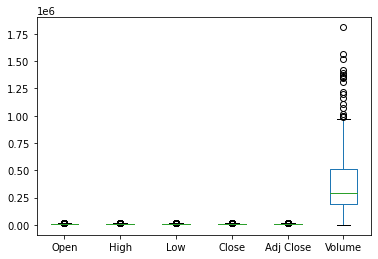

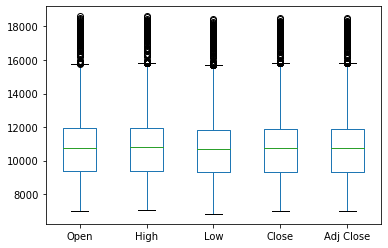

In [9]:
dataset[["Open", "High", "Low", "Close", "Adj Close", "Volume"]].plot(kind="box")
dataset[["Open", "High", "Low", "Close", "Adj Close"]].plot(kind="box")

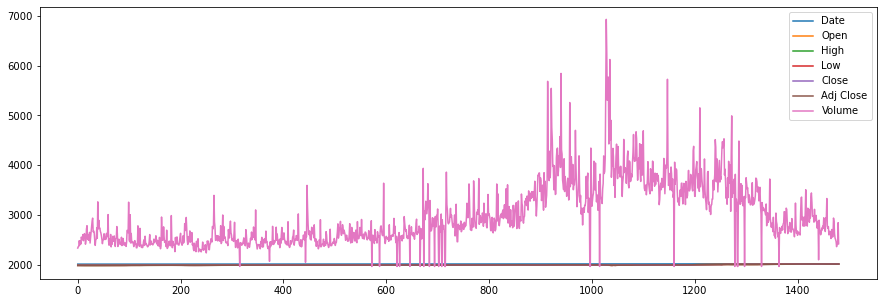

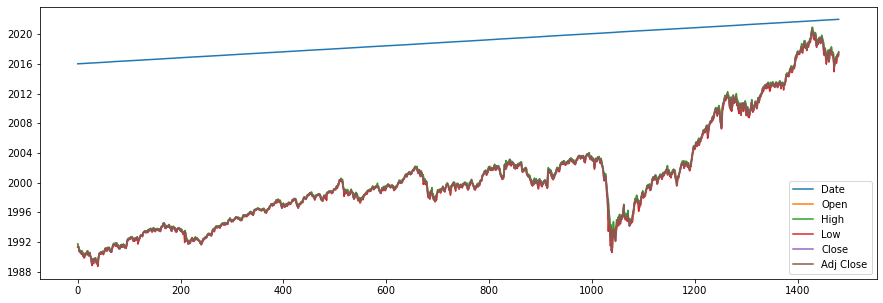

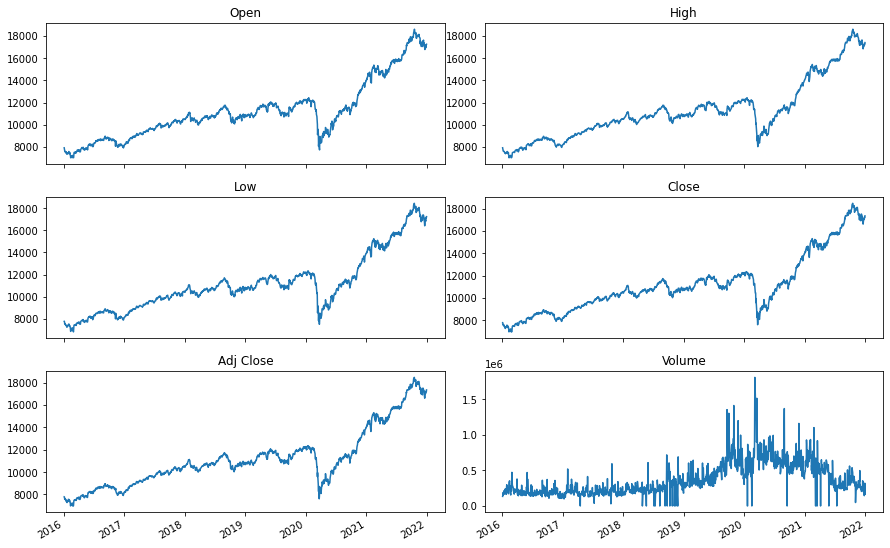

In [10]:
from matplotlib.gridspec import GridSpec 

#Plot all variables
dataset.plot(figsize=(15, 5))


#Removing Volume and plotting all variables
display_dataset = dataset.copy()
display_dataset.drop("Volume", axis=1, inplace=True)
#display_dataset.drop("Date", axis=1, inplace=True)
display_dataset.plot(figsize=(15, 5))


#Plotting all variables one-by-one
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(6, 2, figure=fig)
gs.update(wspace=0.1, hspace=0.6)

figure_open = fig.add_subplot(gs[0:2, 0:1])
figure_high = fig.add_subplot(gs[0:2, 1:2])

figure_low =   fig.add_subplot(gs[2:4, 0:1])
figure_close = fig.add_subplot(gs[2:4, 1:2])

figure_adj_close = fig.add_subplot(gs[4:6, 0:1])
figure_volume =    fig.add_subplot(gs[4:6, 1:2])

#fig

figure_open.plot(dataset.Date, dataset.Open)
figure_open.set_title("Open")

figure_high.plot(dataset.Date, dataset.High)
figure_high.set_title("High")

figure_low.plot(dataset.Date, dataset.Low)
figure_low.set_title("Low")

figure_close.plot(dataset.Date, dataset.Close)
figure_close.set_title("Close")

figure_adj_close.plot(dataset.Date, dataset["Adj Close"])
figure_adj_close.set_title("Adj Close")

figure_volume.plot(dataset.Date, dataset.Volume)
figure_volume.set_title("Volume")


plt.gcf().autofmt_xdate()

In [11]:
'''
# Building Regression Model
from sklearn.model_selection import train_test_split

#For Pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
#===

#Splitting the data into test and train methods
X= np.array(dataset.index).reshape(-1,1)
Y=dataset.Close

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3, random_state=42)
#===

#Feature scaling
scaler = StandardScaler().fit(X_train)
#===

#Creating Linear Regression Model
lm = LinearRegression()
lm.fit(X_train, Y_train)
#===
'''

LinearRegression()

In [11]:
#Building LSTM Function
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [12]:
dataset["Close"] = pd.to_numeric(dataset.Close, errors="coerce")
trainData = dataset.iloc[:,4:5].values.copy()

#trainData = dataset["Close"]
#print(trainData)
#dataset.info()

In [15]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1481, 1)

In [66]:
#Creating Training Model
X_train=[]
Y_train=[]

timestep = 60
data_count, _ = trainData.shape
#print(data_count)

#for i in range(timestep, data_count):
#for i in range(60, 1481):
for i in range(timestep, data_count):
    X_train.append(trainData[i-timestep : i, 0])
    Y_train.append(trainData[i,0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [67]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape

(1421, 60, 1)

In [111]:
#Initializing the model
model = Sequential()

model.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error")

In [112]:
#Fitting the model
hist = model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
45/45 - 2s - loss: 0.0266
Epoch 2/20
45/45 - 2s - loss: 0.0036
Epoch 3/20
45/45 - 2s - loss: 0.0034
Epoch 4/20
45/45 - 2s - loss: 0.0030
Epoch 5/20
45/45 - 2s - loss: 0.0029
Epoch 6/20
45/45 - 2s - loss: 0.0027
Epoch 7/20
45/45 - 2s - loss: 0.0025
Epoch 8/20
45/45 - 2s - loss: 0.0026
Epoch 9/20
45/45 - 2s - loss: 0.0027
Epoch 10/20
45/45 - 2s - loss: 0.0024
Epoch 11/20
45/45 - 2s - loss: 0.0025
Epoch 12/20
45/45 - 2s - loss: 0.0025
Epoch 13/20
45/45 - 2s - loss: 0.0021
Epoch 14/20
45/45 - 2s - loss: 0.0024
Epoch 15/20
45/45 - 2s - loss: 0.0021
Epoch 16/20
45/45 - 2s - loss: 0.0021
Epoch 17/20
45/45 - 3s - loss: 0.0022
Epoch 18/20
45/45 - 2s - loss: 0.0019
Epoch 19/20
45/45 - 2s - loss: 0.0019
Epoch 20/20
45/45 - 2s - loss: 0.0020


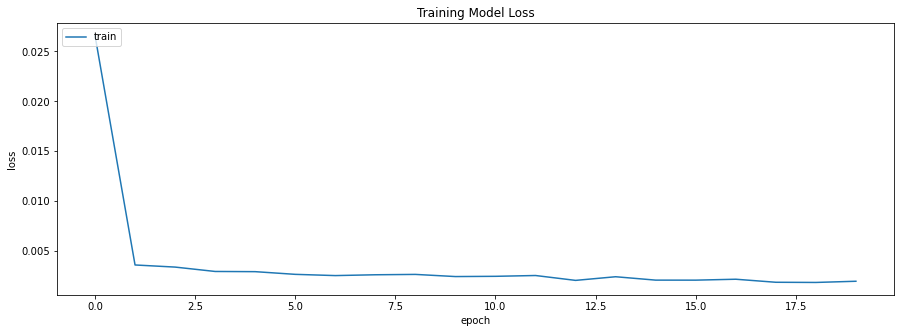

In [114]:
plt.figure(figsize=(15, 5))

plt.plot(hist.history['loss'])
plt.title("Training Model Loss")         
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper left")
plt.show()

In [120]:
#Comparing
testData = pd.read_csv("./NSE Data/NSE Out of Time Testing Data - 1st Jan 2022 to 4th Feb 2022.csv")
#testData = pd.read_csv("./NSE Data/NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv")
#testData["Date"] = pd.to_datetime(testData["Date"])

testData["Close"] = pd.to_numeric(testData.Close, errors="coerce")

testData = testData.iloc[:,4:5]

timestep = 2
data_count, _ = testData.shape
print(data_count)

y_test = testData.iloc[timestep:,0:].values

inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
print(inputClosing_scaled.shape)

x_test=[]
#y_test=[]

for i in range(timestep, data_count):
    x_test.append(inputClosing_scaled[i-timestep:i, 0])


#print(x_test)
x_test = np.array(x_test)
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1) )
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))


x_test.shape

23
(23, 1)


(21, 2, 1)

In [121]:
y_pred = model.predict(x_test)
y_pred
#x_test

array([[0.7909811 ],
       [0.7909701 ],
       [0.790963  ],
       [0.7909736 ],
       [0.79096967],
       [0.7909585 ],
       [0.7909556 ],
       [0.79094726],
       [0.790945  ],
       [0.79094505],
       [0.79094243],
       [0.79095256],
       [0.7909621 ],
       [0.79097295],
       [0.7909818 ],
       [0.79101425],
       [0.79100496],
       [0.79101723],
       [0.79101795],
       [0.79100055],
       [0.79098445]], dtype=float32)

In [122]:
predicted_stock = sc.inverse_transform(y_pred)
predicted_stock

array([[0.7909811 ],
       [0.7909701 ],
       [0.790963  ],
       [0.7909736 ],
       [0.79096967],
       [0.7909585 ],
       [0.7909556 ],
       [0.79094726],
       [0.790945  ],
       [0.79094505],
       [0.79094243],
       [0.79095256],
       [0.7909621 ],
       [0.79097295],
       [0.7909818 ],
       [0.79101425],
       [0.79100496],
       [0.79101723],
       [0.79101795],
       [0.79100055],
       [0.79098445]], dtype=float32)

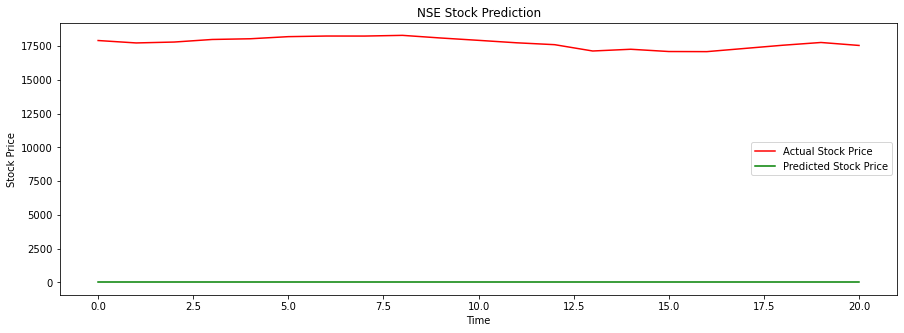

In [123]:
plt.figure(figsize=(15, 5))

plt.plot(y_test, color="red", label = "Actual Stock Price")
plt.plot(predicted_stock, color="green", label = "Predicted Stock Price")
plt.title("NSE Stock Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()

plt.show()
